In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
all_data = pd.read_csv('train.csv',parse_dates=["purchase_date","release_date"]).set_index("id")

In [3]:
training_data = all_data.drop(["playtime_forever"], axis=1)

In [4]:
training_data = training_data.fillna(value={"purchase_date": training_data["purchase_date"].describe().top, 
                                              "total_positive_reviews": training_data["total_positive_reviews"].mean(), 
                                              "total_negative_reviews":training_data["total_negative_reviews"].mean()})


In [5]:
def eliminate_high_reviews_row(df,column):
    std = df[column].std()
    df[column] = df[column].apply(lambda x: None if x > std else x)

eliminate_high_reviews_row(training_data,"total_negative_reviews")
eliminate_high_reviews_row(training_data,"total_positive_reviews")


In [8]:
training_data.isnull().sum(axis = 0)

is_free                    0
price                      0
genres                     0
categories                 0
tags                       0
purchase_date              0
release_date               0
total_positive_reviews    22
total_negative_reviews     7
dtype: int64

In [6]:
training_data = training_data.fillna(value={"purchase_date": training_data["purchase_date"].describe().top, 
                                              "total_positive_reviews": training_data["total_positive_reviews"].max(), 
                                              "total_negative_reviews":training_data["total_negative_reviews"].max()})


In [7]:
training_data.isnull().sum(axis = 0)

is_free                   0
price                     0
genres                    0
categories                0
tags                      0
purchase_date             0
release_date              0
total_positive_reviews    0
total_negative_reviews    0
dtype: int64

In [9]:
def extract_date(df,column):
    df[column+"_year"] = df[column].apply(lambda x:x.year)
    df[column+"_month"] = df[column].apply(lambda x:x.month)

def is_free_to_int(df):
    df["is_free"] = df["is_free"].apply(lambda x:0 if x == False else 1)

In [10]:
extract_date(training_data,'purchase_date')
extract_date(training_data,'release_date')
is_free_to_int(training_data)

In [11]:
genres = training_data["genres"].str.get_dummies(",") 
genres = genres.drop(["Free to Play"], axis=1) #drop Free to Play
categories = training_data["categories"].str.get_dummies(",")
tags = training_data["tags"].str.get_dummies(",")

In [12]:
def eliminate_duplicate_columns(df1,df2):
    for c1 in df1.columns:
        for c2 in df2.columns:
            if c1 == c2:
                df1 = df1.drop(c1,axis = 1)
    return df1

In [13]:
tags = eliminate_duplicate_columns(tags,genres)
tags = eliminate_duplicate_columns(tags,categories)

In [14]:
features_train = pd.concat([training_data.drop(["genres", "categories","tags","purchase_date","release_date"], axis=1), genres, categories, tags], axis = 1)
features = features_train
features = (features - features.mean()) / features.std()

In [15]:
features

,is_free,price,total_positive_reviews,total_negative_reviews,purchase_date_year,purchase_date_month,release_date_year,release_date_month,Action,Adventure,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
id,,,,,,,,,,,,,,,,,,,,,
0,-0.307938,-0.073176,-0.662273,-0.413077,0.329292,0.090047,-0.726949,1.552930,-0.957486,0.968289,...,-0.091928,3.639066,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
1,3.238313,-0.077185,-0.689242,-0.440839,-1.868039,1.248483,0.026377,0.356177,-0.957486,-1.029857,...,-0.091928,-0.274026,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
2,-0.307938,-0.071767,-0.457806,-0.249106,0.329292,0.090047,-0.350286,-1.738142,-0.957486,0.968289,...,-0.091928,-0.274026,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
3,-0.307938,-0.066458,2.690350,0.064086,-1.868039,1.248483,-1.856939,-1.139765,1.041476,-1.029857,...,-0.091928,-0.274026,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
4,-0.307938,-0.071984,-0.007837,-0.289593,0.329292,-1.068390,-1.103612,0.056988,1.041476,-1.029857,...,-0.091928,-0.274026,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
5,-0.307938,-0.049229,0.495614,0.527654,1.427958,-0.199563,1.533029,-1.139765,-0.957486,-1.029857,...,-0.091928,-0.274026,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
6,-0.307938,-0.073284,2.382644,-0.141528,0.329292,-1.358000,-1.103612,0.954553,1.041476,-1.029857,...,-0.091928,-0.274026,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
7,3.238313,-0.077185,-0.688469,-0.439971,0.329292,-1.647609,0.403040,-0.840577,-0.957486,-1.029857,...,-0.091928,-0.274026,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
8,-0.307938,-0.072851,-0.546130,-0.429560,0.329292,1.248483,-0.350286,-1.438953,-0.957486,0.968289,...,-0.091928,-0.274026,-0.236761,-0.052926,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926


In [16]:
test_data = pd.read_csv('test.csv',parse_dates=["purchase_date","release_date"]).set_index("id")

In [17]:
test_data = test_data.fillna(value={"purchase_date": training_data["purchase_date"].describe().top, 
                                              "total_positive_reviews": training_data["total_positive_reviews"].mean(), 
                                              "total_negative_reviews":training_data["total_negative_reviews"].mean()})



In [28]:
test_data.isnull().sum(axis = 0)

is_free                   0
price                     0
genres                    0
categories                0
tags                      0
purchase_date             0
release_date              0
total_positive_reviews    0
total_negative_reviews    0
dtype: int64

In [18]:
extract_date(test_data,'purchase_date')
extract_date(test_data,'release_date')
is_free_to_int(test_data)
genres_test = test_data["genres"].str.get_dummies(",") 
categories_test = test_data["categories"].str.get_dummies(",")
tags_test = test_data["tags"].str.get_dummies(",")

tags_test = eliminate_duplicate_columns(tags_test,genres_test)
tags_test = eliminate_duplicate_columns(tags_test,categories_test)


In [19]:
def same_test_feature(df_train,df_test):
    for c in df_test.columns:
        if c not in df_train.columns:
            df_test = df_test.drop(c,axis=1)
            
    i=0
    for c in df_train.columns:
        if c not in df_test.columns:
            mean = df_train[c].mean()
            df_test.insert(i,c,mean)
        i = i+1
    return df_test        

In [20]:
genres_test = same_test_feature(genres,genres_test)
categories_test = same_test_feature(categories,categories_test)
tags_test = same_test_feature(tags,tags_test)

In [21]:
features_test = pd.concat([test_data.drop(["genres", "categories","tags","purchase_date","release_date"], axis=1), genres_test, categories_test, tags_test], axis = 1)

In [23]:
for c in features_train.columns:
    mean = features_train[c].mean()
    std = features_train[c].std()
    features_test[c] = (features_test[c] - mean) / std

In [24]:
features_test

,is_free,price,total_positive_reviews,total_negative_reviews,purchase_date_year,purchase_date_month,release_date_year,release_date_month,Action,Adventure,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
id,,,,,,,,,,,,,,,,,,,,,
0,-0.307938,-0.073393,-0.489565,-0.116368,0.329292,0.958874,-1.103612,-0.541388,1.041476,0.968289,...,0.0,-0.274026,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
1,-0.307938,-0.064616,-0.245765,0.205499,1.427958,0.090047,1.156366,-0.840577,1.041476,0.968289,...,0.0,-0.274026,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
2,-0.307938,-0.074910,-0.637932,-0.402377,1.427958,0.090047,0.779703,-1.139765,-0.957486,-1.029857,...,0.0,-0.274026,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
3,-0.307938,-0.073284,-0.685842,-0.429560,0.329292,-1.647609,-2.986928,0.056988,1.041476,-1.029857,...,0.0,-0.274026,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
4,-0.307938,-0.073501,2.426535,0.631475,-0.769374,-1.358000,-0.726949,0.356177,1.041476,0.968289,...,0.0,-0.274026,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
5,-0.307938,-0.069817,-0.661114,-0.417414,0.329292,-0.199563,1.156366,-1.438953,-0.957486,0.968289,...,0.0,3.639066,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
6,-0.307938,-0.069817,-0.565217,-0.336731,1.427958,-0.199563,0.779703,0.655365,1.041476,-1.029857,...,0.0,-0.274026,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
7,-0.307938,-0.075235,-0.671237,-0.416836,0.329292,-1.068390,-2.610265,-0.242200,1.041476,0.968289,...,0.0,-0.274026,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926
8,-0.307938,-0.069817,-0.554012,-0.067785,0.329292,-0.199563,-1.480275,-1.438953,-0.957486,-1.029857,...,0.0,-0.274026,-0.236761,0.0,-0.052926,-0.052926,-0.052926,-0.119016,-0.216309,-0.052926


In [25]:
# Try some complex model
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
model1.fit(features, all_data["playtime_forever"])
predict_y = model1.predict(features)
print("training accuracy:", (predict_y == all_data["playtime_forever"]).sum()/ len(predict_y))


training accuracy: 0.12044817927170869


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20540 missing from current font.
  font.se

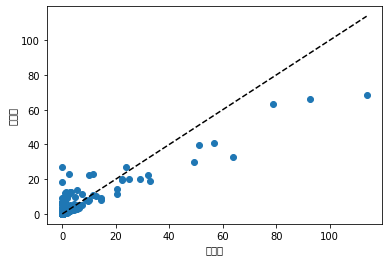

In [26]:
plt.scatter(all_data["playtime_forever"], predict_y)
plt.plot([all_data["playtime_forever"].min(),all_data["playtime_forever"].max()], [all_data["playtime_forever"].min(),all_data["playtime_forever"].max()], 'k--')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.show()

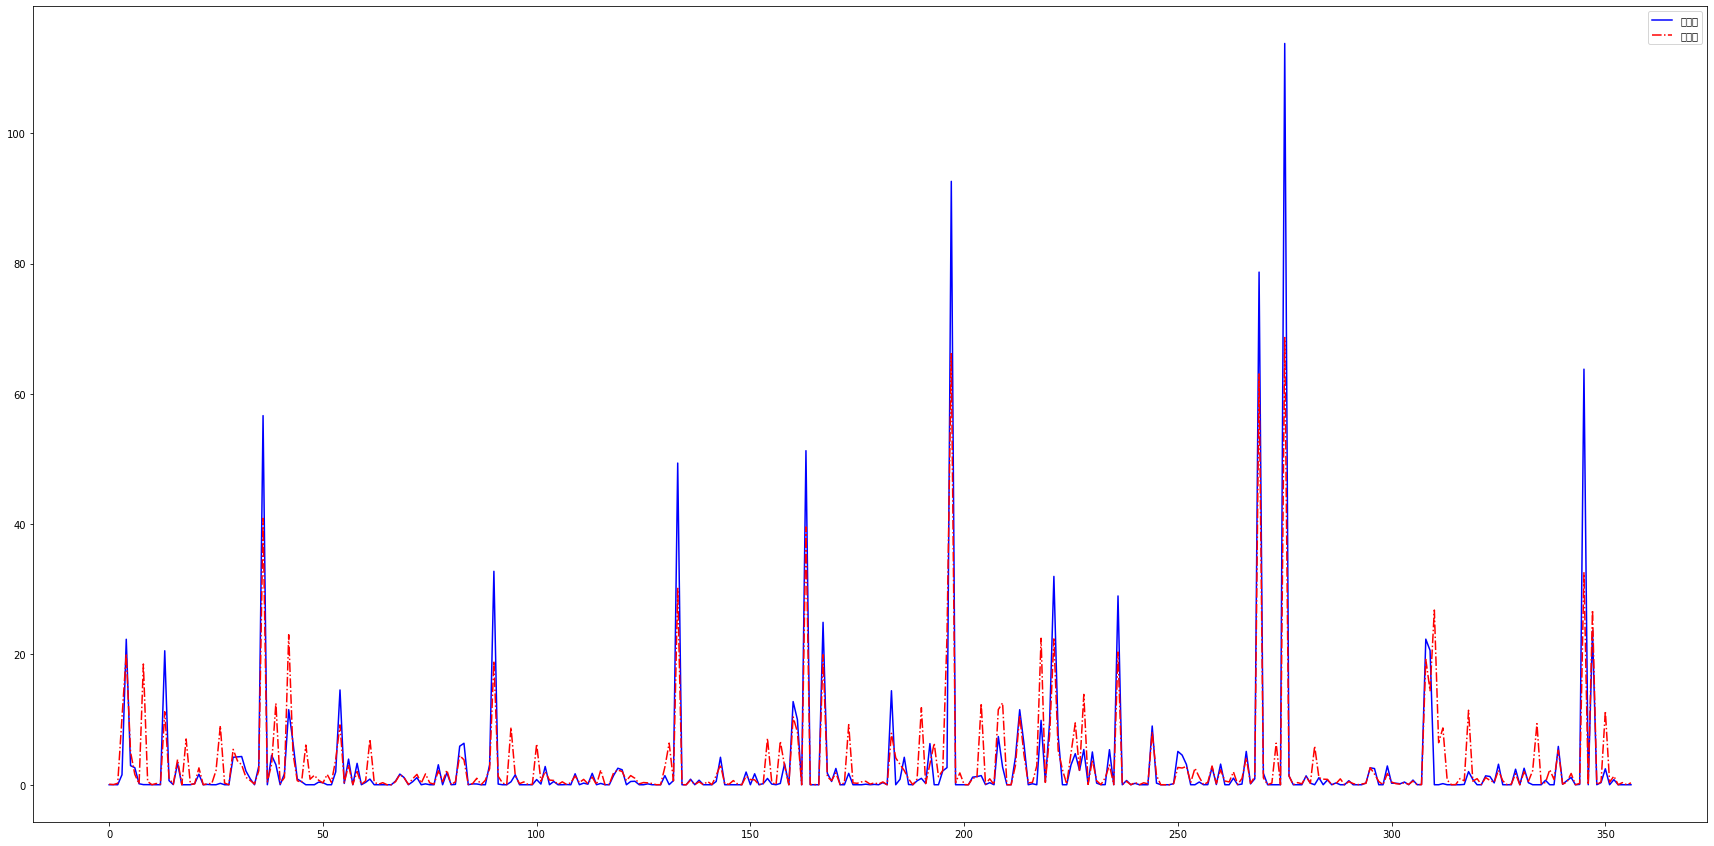

In [27]:
plt.rcParams['figure.figsize'] = (30.0, 15.0)
plt.plot(range(all_data["playtime_forever"].shape[0]),all_data["playtime_forever"],color="blue", linewidth=1.5, linestyle="-")

plt.plot(range(all_data["playtime_forever"].shape[0]),predict_y,color="red", linewidth=1.5, linestyle="-.")

plt.legend(['真实值','预测值'])

plt.show() ##显示图片

In [28]:
predict_test1 = model1.predict(features_test).reshape(90,1)
index = pd.DataFrame(np.arange(90).astype("int32").reshape(90,1),columns=['id'],dtype='int32')
predict_test1 = pd.DataFrame(predict_test1, columns=['playtime_forever'])
predict_test1 = pd.concat([index,predict_test1], axis = 1).set_index('id')

In [32]:
predict_test1

,playtime_forever
id,
0,0.855000
1,0.488333
2,0.700000
3,0.280000
4,2.963333
5,0.000000
6,10.785000
7,0.218333
8,2.293333


In [31]:
#result
predict_test1.to_csv('predict_test_result.csv')